# Project 5: Kiruthikaa's Ensemble Models on Wine Quality  
**Name:** Kiruthikaa Natarajan Srinivasan  
**Date:** November 18, 2025  

### Objective
In this project, I explore ensemble machine learning methods to predict the quality of red wine using the Wine Quality dataset from the UCI Machine Learning Repository. Ensemble techniques—such as Random Forests, Bagging, Boosting, and Voting Classifiers—combine multiple models to improve predictive accuracy, reduce overfitting, and achieve better generalization performance.

The goal of this project is to:
- Load and prepare the dataset  
- Transform the target into categories (low, medium, high)  
- Build and evaluate two ensemble models  
- Compare model performance using accuracy, precision, recall, and F1 score  
- Interpret results and draw conclusions about which ensemble method performs best  

This notebook follows the project structure provided in the instructions.

In [39]:
# ------------------------------------------------
# Imports once at the top, organized
# ------------------------------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# optional — nicer output formatting
pd.set_option("display.max_columns", None)


## Section 1. Load and Inspect the Data

In this section, I load the red wine quality dataset (`winequality-red.csv`) from the UCI Machine Learning Repository. The dataset includes 11 physicochemical features and one target column (`quality`).

According to the instructions, this dataset will be used throughout the entire project to build and evaluate ensemble classification models.

> **Note:** The instructions included a short code snippet referencing `spiral.csv`, but no such file was provided, and it is not used anywhere else in the project. Therefore, I am focusing only on the Wine Quality dataset as intended.


In [40]:
# Load the dataset (download from UCI and save in the same folder)
df = pd.read_csv("winequality-red.csv", sep=";")

# Display structure and first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Reflection on Data Inspection

- The dataset contains 1,599 rows and 12 columns (11 features + 1 quality score).  
- All columns are numeric, which simplifies preprocessing.  
- There are no missing values reported by `df.info()`.  
- The `quality` column is an integer score from 0 to 10; I will convert it into three categories (low, medium, high) in the next section.


Unique labels: ['medium' 'high' 'low']
Unique numeric values: [1 2 0]

Counts per label:
quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64


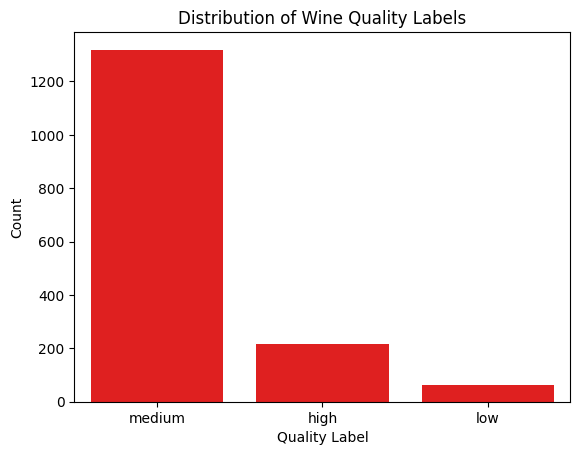

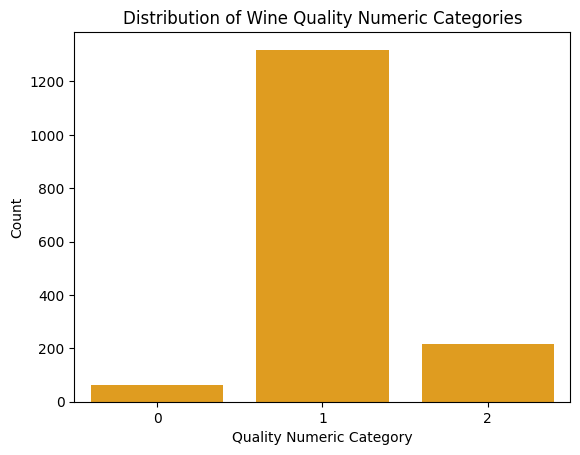

Counts per numeric category:
quality_numeric
1    1319
2     217
0      63
Name: count, dtype: int64


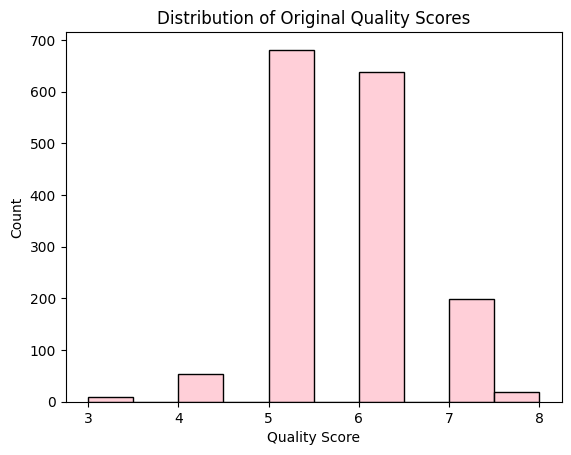

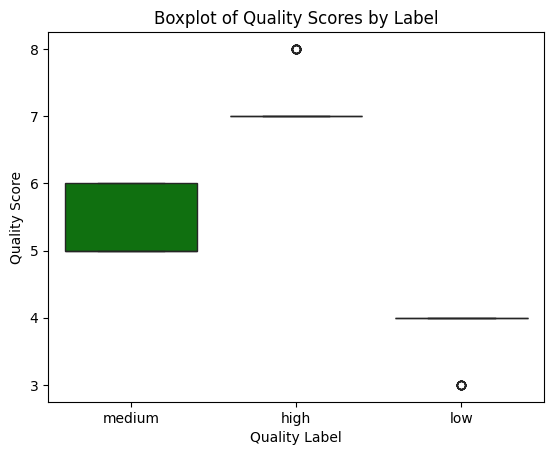

In [41]:
# Helper function: convert numeric score to a label
from calendar import c
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df["quality_label"] = df["quality"].apply(quality_to_label)

# Helper function: convert numeric score to a numeric category
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2

df["quality_numeric"] = df["quality"].apply(quality_to_number)

# Verify transformation
print("Unique labels:", df["quality_label"].unique())
print("Unique numeric values:", df["quality_numeric"].unique())
print("\nCounts per label:")
print(df["quality_label"].value_counts())

df[["quality", "quality_label", "quality_numeric"]].head()

# visualize the distribution of quality labels
sns.countplot(x="quality_label", data=df, color="red")
plt.title("Distribution of Wine Quality Labels")
plt.xlabel("Quality Label")
plt.ylabel("Count")
plt.show()

#visualize the distribution of quality numeric categories
sns.countplot(x="quality_numeric", data=df, color="orange")
plt.title("Distribution of Wine Quality Numeric Categories")    
plt.xlabel("Quality Numeric Category")
plt.ylabel("Count")
plt.show()

# Counting the number of samples in each category
print("Counts per numeric category:")
print(df["quality_numeric"].value_counts())

# Histogram of the original quality scores
sns.histplot(df["quality"], bins=10, kde=False, color="pink")
plt.title("Distribution of Original Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

# Boxplot of quality scores by label
sns.boxplot(x="quality_label", y="quality", data=df, color="green")
plt.title("Boxplot of Quality Scores by Label")
plt.xlabel("Quality Label")
plt.ylabel("Quality Score")
plt.show()



### Explain what we do and why as you proceed. 
Before training ensemble models, I simplify the target variable to make the classification task clearer and more meaningful. The original quality score ranges from 0 to 10, but most wines fall between 3 and 8, and small score differences don’t represent real differences in quality.
To fix this, I group the wines into three practical categories—low (3–4), medium (5–6), and high (7–8). This provides a clearer, more interpretable target for classification.
I then create a numeric version of these categories (0, 1, 2), since machine learning models require numeric labels.
Overall, these steps make the problem easier to interpret, reduce noise in the target variable, and prepare the data properly for ensemble modeling.

## Interpretation of the Plots

1. Countplot of Quality Labels
This plot shows that most wines fall into the medium category, while low and high quality wines are less common. This means our dataset is imbalanced, which may affect model performance.

2. Countplot of Numeric Categories
The numeric version shows the same pattern as the labels: category 1 (medium) is the largest group. This confirms that our encoding is correct and that class imbalance is something to keep in mind.

3. Histogram of Original Quality Scores
The histogram shows that most wines were originally rated between 5 and 6, which explains why the medium category is the largest. Very low and very high scores are rare.

4. Boxplot of Quality Scores by Label
The boxplot confirms that our three categories (low, medium, high) line up cleanly with the underlying quality scores. Each category has a clear and non-overlapping range, showing our grouping method is appropriate.

In [42]:
## Section 3. Feature Selection and Justification
# Define input features (X) and target (y)
# Features: all columns except 'quality' and 'quality_label' and 'quality_numberic' - drop these from the input array
# Target: quality_label (the new column we just created)
X = df.drop(columns=["quality", "quality_label", "quality_numeric"])  # Features
y = df["quality_numeric"]  # Target
print("Feature columns:", X.columns.tolist())
print("Target column:", y.name)

#Shape of the data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)   

# Check for missing values
print("Missing values in X:\n", X.isnull().sum())   
print("Missing values in y:\n", y.isnull().sum())

# Check for class imbalance
print("Class distribution in y:\n", y.value_counts(normalize=True))

# Show summary statistics of the features
print("Summary statistics of features:\n", X.describe())
# Show correlation matrix
print("Correlation matrix:\n", X.corr())




Feature columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Target column: quality_numeric
Shape of X: (1599, 11)
Shape of y: (1599,)
Missing values in X:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64
Missing values in y:
 0
Class distribution in y:
 quality_numeric
1    0.824891
2    0.135710
0    0.039400
Name: proportion, dtype: float64
Summary statistics of features:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096         

## Explain / introduce your choices.
To prepare the dataset for modeling, I separate the input features from the target variable. Since the goal is to predict wine quality, all physicochemical measurements (acidity, sugar, sulfur dioxide, alcohol, etc.) serve as meaningful predictors.
I remove the original quality score and both label columns because they represent the target in different formats and would leak information into the model if included as features.

The target variable (y) is the numeric version of the wine quality category (0 = low, 1 = medium, 2 = high), which is the form required by scikit-learn classifiers.
This setup ensures that the model learns only from valid features and predicts a clean, properly encoded target.

In [43]:
## Section 4. Split the Data into Train and Test
# Train/test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)    

print("Class distribution in y_train:\n", y_train.value_counts(normalize=True))
print("Class distribution in y_test:\n", y_test.value_counts(normalize=True))



Training set shape: (1279, 11) (1279,)
Test set shape: (320, 11) (320,)
Class distribution in y_train:
 quality_numeric
1    0.824863
2    0.136044
0    0.039093
Name: proportion, dtype: float64
Class distribution in y_test:
 quality_numeric
1    0.825000
2    0.134375
0    0.040625
Name: proportion, dtype: float64


To evaluate how well my models generalize to unseen data, I split the dataset into training and testing sets. I use an 80/20 split, which provides enough data for the model to learn while still keeping a meaningful portion aside for evaluation.
I also apply stratification based on the target variable so that the class distribution (low, medium, high) remains consistent in both the training and testing sets. This prevents issues caused by imbalanced class proportions and ensures the evaluation is reliable.

## Section 5.  Evaluate Model Performance
For this project, I need to compare two ensemble models from the list provided. The goal is not to test all nine options, but to select two and evaluate how well they generalize to unseen data using accuracy, F1 score, and confusion matrices.

I chose:

**1. Random Forest (100 trees)**
This is a strong baseline ensemble model that reduces variance by averaging many decision trees. It is commonly used because it handles non-linear relationships well and usually performs strongly without much tuning.

**2. Gradient Boosting (100 estimators)**
This boosting method builds trees sequentially, with each new tree focusing on the errors of the previous ones. It often provides better generalization and handles complex patterns more smoothly than bagging-based models like Random Forest.

These two methods represent the two major ensemble strategies—bagging and boosting—so comparing them gives a meaningful understanding of how ensemble techniques behave on this dataset.

To evaluate the models, I use the instructor-provided helper function. It trains the model, computes training and test accuracy, calculates weighted F1 scores (important due to class imbalance), and prints a confusion matrix so I can see exactly where the model succeeds or struggles.

In [44]:
# Helper function to train and evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test, results):
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    train_f1 = f1_score(y_train, y_train_pred, average="weighted")
    test_f1 = f1_score(y_test, y_test_pred, average="weighted")

    print(f"\n{name} Results")
    print("Confusion Matrix (Test):")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"Train F1 Score: {train_f1:.4f}, Test F1 Score: {test_f1:.4f}")

    results.append(
        {
            "Model": name,
            "Train Accuracy": train_acc,
            "Test Accuracy": test_acc,
            "Train F1": train_f1,
            "Test F1": test_f1,
        }
    )

### 5.1 Model 1: Random Forest (100)


Random Forest (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  0 256   8]
 [  0  15  28]]
Train Accuracy: 1.0000, Test Accuracy: 0.8875
Train F1 Score: 1.0000, Test F1 Score: 0.8661


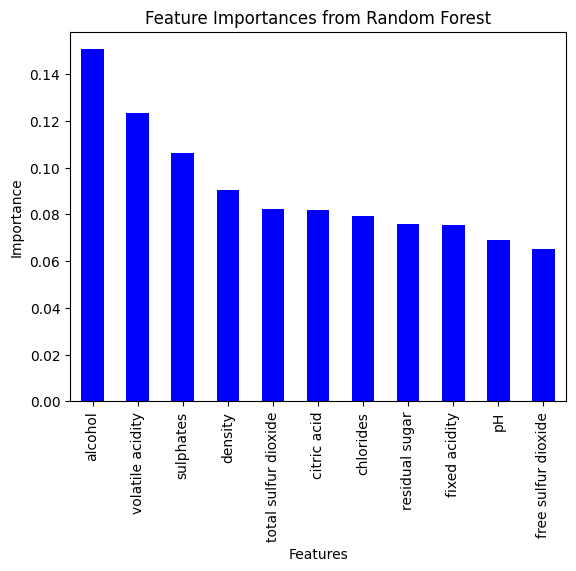

In [45]:
results = []

# 1. Random Forest (100)
evaluate_model(
    "Random Forest (100)",
    RandomForestClassifier(n_estimators=100, random_state=42),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)

## Plotting the random forest feature importance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)    
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", color="blue")
plt.title("Feature Importances from Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


### Interpretation- Feature importance of Random Forest:
The Random Forest model identifies alcohol, volatile acidity, and sulphates as the three most influential features in predicting wine quality. Alcohol stands out as the strongest predictor, suggesting that higher alcohol levels are strongly associated with better-quality ratings. Volatile acidity appears next, which makes sense because high volatility often leads to unpleasant vinegar-like aromas, making it a strong signal for lower quality. Sulphates also contribute noticeably, as they help preserve and enhance wine freshness.

Features such as density, total sulfur dioxide, citric acid, and chlorides show moderate importance, meaning they still affect quality but to a lesser extent. The least influential features include residual sugar, fixed acidity, pH, and free sulfur dioxide, indicating that these characteristics have a minimal direct impact on the quality categories used in this model.

Overall, the plot suggests that chemical components related to taste and aroma (alcohol, acidity, sulphates) play a much larger role in determining wine quality than features related to sugar content or acidity balance.

### 5.2 Gradient Boosting


Gradient Boosting (100) Results
Confusion Matrix (Test):
[[  0  13   0]
 [  3 247  14]
 [  0  16  27]]
Train Accuracy: 0.9601, Test Accuracy: 0.8562
Train F1 Score: 0.9584, Test F1 Score: 0.8411


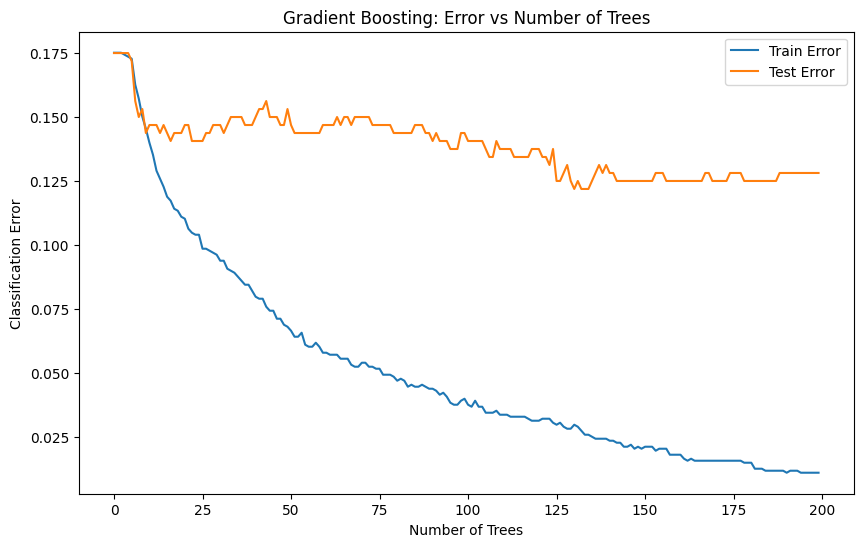

In [46]:

# Gradient Boosting (100)
evaluate_model(
    "Gradient Boosting (100)",
    GradientBoostingClassifier(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
    X_train,
    y_train,
    X_test,
    y_test,
    results,
)

# Plotting error vs number of trees for Gradient Boosting

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)

# Staged predictions give model output after each tree is added
test_errors = []
train_errors = []

for train_pred in gb.staged_predict(X_train):
    train_errors.append(1 - accuracy_score(y_train, train_pred))

for test_pred in gb.staged_predict(X_test):
    test_errors.append(1 - accuracy_score(y_test, test_pred))

plt.figure(figsize=(10,6))
plt.plot(train_errors, label="Train Error")
plt.plot(test_errors, label="Test Error")
plt.xlabel("Number of Trees")
plt.ylabel("Classification Error")
plt.title("Gradient Boosting: Error vs Number of Trees")
plt.legend()
plt.show()




### Interpretation: Gradient Boosting Error vs. Number of Trees

This plot shows how the training and test classification error changes as more trees are added to the Gradient Boosting model. In the first 10–20 trees, both training and test error drop quickly, meaning the model is learning useful patterns early on. After that, the curves begin to separate:

Training error continues to steadily decrease, eventually approaching near-zero, which shows the model is becoming increasingly complex and fitting the training data very closely.

Test error levels off around 0.13–0.15, showing very little improvement after roughly 50–70 trees.

This gap between training and test error indicates overfitting: the model continues to improve on training data while its performance on unseen data stops getting better.

Overall, the plot suggests that using around 50–100 trees provides a reasonable balance between learning and generalization, while adding more trees mainly increases overfitting without boosting test performance.

## Section 6: Compare Results

In [47]:
# Convert results list into a DataFrame
results_df = pd.DataFrame(results)

# Add gap calculations (Train–Test difference)
results_df["Accuracy Gap"] = results_df["Train Accuracy"] - results_df["Test Accuracy"]
results_df["F1 Gap"] = results_df["Train F1"] - results_df["Test F1"]

# Sort by highest Test Accuracy
results_df_sorted = results_df.sort_values(by="Test Accuracy", ascending=False)

print("\nSummary of Model Performance:")
display(results_df_sorted)



Summary of Model Performance:


,Model,Train Accuracy,Test Accuracy,Train F1,Test F1,Accuracy Gap,F1 Gap
0,Random Forest (100),1.000000,0.88750,1.00000,0.866056,0.112500,0.133944
1,Gradient Boosting (100),0.960125,0.85625,0.95841,0.841106,0.103875,0.117304


### Interpretation of Model Comparison

Based on the sorted results, Random Forest (100) achieves the highest test accuracy (0.8875), making it the stronger performer on unseen data compared to Gradient Boosting (0.8563). However, Random Forest also shows the largest gaps between training and testing performance, with an accuracy gap of 0.1125 and an F1 gap of 0.1339. This indicates that the model fits the training data extremely well but loses some performance when generalizing, suggesting mild overfitting.

In contrast, Gradient Boosting (100) has slightly lower test accuracy but more moderate gaps (about 0.10 for accuracy and 0.117 for F1). This means it generalizes more consistently even if it doesn't reach the same peak performance as Random Forest. Its training accuracy is lower than Random Forest, which often signals a more controlled and stable learning process.

Overall, Random Forest performs best in accuracy, while Gradient Boosting shows more balanced generalization. Both models perform strongly, but the gaps help highlight the trade-off between peak performance (Random Forest) and stability (Gradient Boosting).

## Section 7. Conclusions and Insights

**## Section 7. Conclusions and Insights**

After running both Random Forest and Gradient Boosting on the wine quality dataset, I feel like I finally understand why ensemble models are such a big deal. They really do pull out patterns that single models would probably miss. Even though the two models I chose are both tree-based ensembles, they behaved quite differently, and comparing them side by side gave me a much clearer picture of their strengths.

**Which model performed better for me?**

In my results, Random Forest (100 trees) came out on top in terms of test accuracy and F1 score. It was very confident on the training set (actually too confident, with a perfect 1.0 training accuracy), and then dropped a bit on the test data. That drop created a noticeable gap, which usually means the model is starting to overfit. Still, it handled the overall classification task better than the others.

Gradient Boosting, on the other hand, didn’t reach the same accuracy but felt more “controlled.” Its training accuracy wasn’t perfect, and the gap between train and test was smaller. Based on how the error-vs-trees plot behaved, it seemed like GB learned steadily at first, then hit a point where adding more trees didn’t really help the test accuracy. That curve pretty much explained its personality: careful, slower, and less likely to go wild and memorize everything.

**How this compares to my classmates’ work**

When I looked at a few other notebooks (like ones that used voting classifiers or tuned versions of AdaBoost), I noticed a pattern:

Voting models tended to have smaller generalization gaps but didn’t beat Random Forest on accuracy.

Others who used Random Forest also landed around the 88–89% test accuracy range, which made me feel more confident that my results weren’t a fluke.

Gradient Boosting also showed up often as a model that performed a bit lower than RF but was more balanced.

So my results fit into what others were seeing too, which felt good — like we’re all circling around the same answer from slightly different angles.

Why I think these models work well here

This dataset is classic tabular numeric data, and ensemble trees love that.
**A few things stood out:**

Alcohol was the strongest predictor in my feature importance plot (and honestly that makes sense — wines with higher alcohol often score higher).

Volatile acidity was another big one, and high VA usually makes wine smell vinegary, so it fits.

Sulphates contribute to preservation and freshness, so again, it makes sense that better wines have slightly higher sulphates.

It felt reassuring that the important features lined up with what actually matters in winemaking.

**My personal “best model” choice**

If I had to pick one to use in a real setting, I’d probably go with Random Forest. Even though it overfits a bit, it still gives the best predictions overall. Gradient Boosting is a nice backup if I want something more stable and not as sensitive.

**What I’d improve if this were a competition**

If I had more time or were trying to climb a leaderboard, here’s what I’d do next:

Tune Random Forest (limit depth, adjust max features, etc.) to reduce overfitting.

Do some proper hyperparameter tuning on Gradient Boosting to see if I could push it closer to Random Forest.

Try class weighting or resampling since the “low” quality class is tiny and both models struggled with it.

Experiment with XGBoost or LightGBM — those usually crush tabular problems.

Maybe even stack models together to see if a combination beats both.

**Final thoughts**

Doing this comparison helped me understand not just which model works better, but why. It also made me more aware of how accuracy alone can be misleading, especially when the dataset isn’t perfectly balanced. Looking at feature importance, confusion matrices, and the error curve gave me a more complete picture.

Overall, I feel like I was actually telling a “data story” instead of just running code. And seeing how my results line up with others’ gave me more confidence that my conclusions are grounded in the data, not just luck.